In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

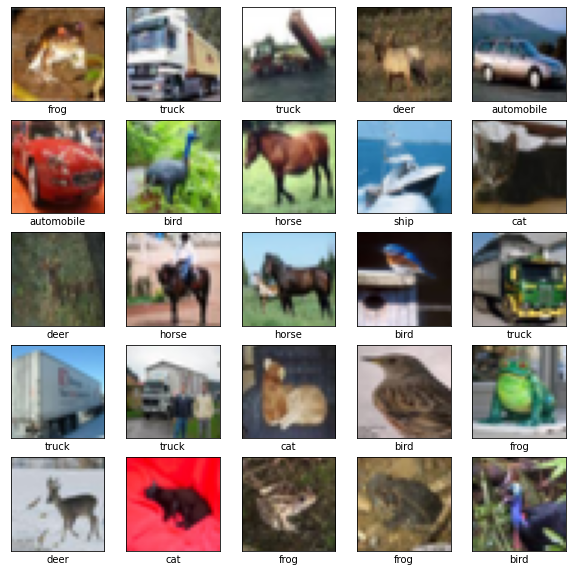

In [5]:
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [6]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255 
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [8]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))


Epoch 1/100
782/782 [==============================] - 14s 12ms/step - loss: 1.7280 - accuracy: 0.4062 - val_loss: 1.2790 - val_accuracy: 0.5297
Epoch 2/100
782/782 [==============================] - 9s 11ms/step - loss: 1.1931 - accuracy: 0.5752 - val_loss: 1.0943 - val_accuracy: 0.6112
Epoch 3/100
782/782 [==============================] - 9s 12ms/step - loss: 0.9929 - accuracy: 0.6519 - val_loss: 0.8027 - val_accuracy: 0.7156
Epoch 4/100
782/782 [==============================] - 9s 12ms/step - loss: 0.8902 - accuracy: 0.6888 - val_loss: 0.8360 - val_accuracy: 0.7118
Epoch 5/100
782/782 [==============================] - 9s 12ms/step - loss: 0.8165 - accuracy: 0.7168 - val_loss: 0.8918 - val_accuracy: 0.6892
Epoch 6/100
782/782 [==============================] - 9s 12ms/step - loss: 0.7644 - accuracy: 0.7336 - val_loss: 0.6723 - val_accuracy: 0.7688
Epoch 7/100
782/782 [==============================] - 9s 12ms/step - loss: 0.7222 - accuracy: 0.7505 - val_loss: 0.6624 - val_accuracy

782/782 [==============================] - 10s 13ms/step - loss: 0.3088 - accuracy: 0.8938 - val_loss: 0.3887 - val_accuracy: 0.8723
Epoch 58/100
782/782 [==============================] - 10s 12ms/step - loss: 0.3038 - accuracy: 0.8947 - val_loss: 0.4014 - val_accuracy: 0.8696
Epoch 59/100
782/782 [==============================] - 10s 13ms/step - loss: 0.2988 - accuracy: 0.8957 - val_loss: 0.4343 - val_accuracy: 0.8647
Epoch 60/100
782/782 [==============================] - 10s 13ms/step - loss: 0.3017 - accuracy: 0.8943 - val_loss: 0.4205 - val_accuracy: 0.8664
Epoch 61/100
782/782 [==============================] - 11s 13ms/step - loss: 0.3005 - accuracy: 0.8948 - val_loss: 0.4204 - val_accuracy: 0.8663
Epoch 62/100
782/782 [==============================] - 10s 13ms/step - loss: 0.2960 - accuracy: 0.8964 - val_loss: 0.4002 - val_accuracy: 0.8719
Epoch 63/100
782/782 [==============================] - 10s 13ms/step - loss: 0.2957 - accuracy: 0.8958 - val_loss: 0.3937 - val_accuracy

Text(0.5, 1.0, 'Loss Curves')

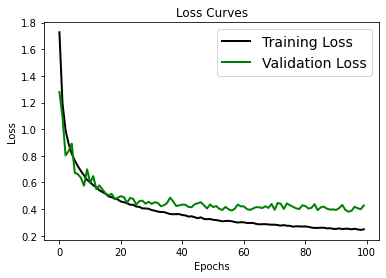

In [9]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

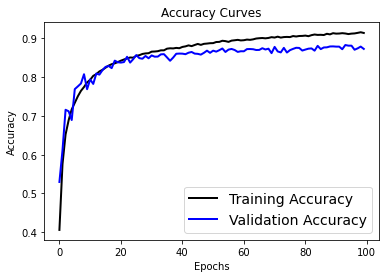

In [10]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

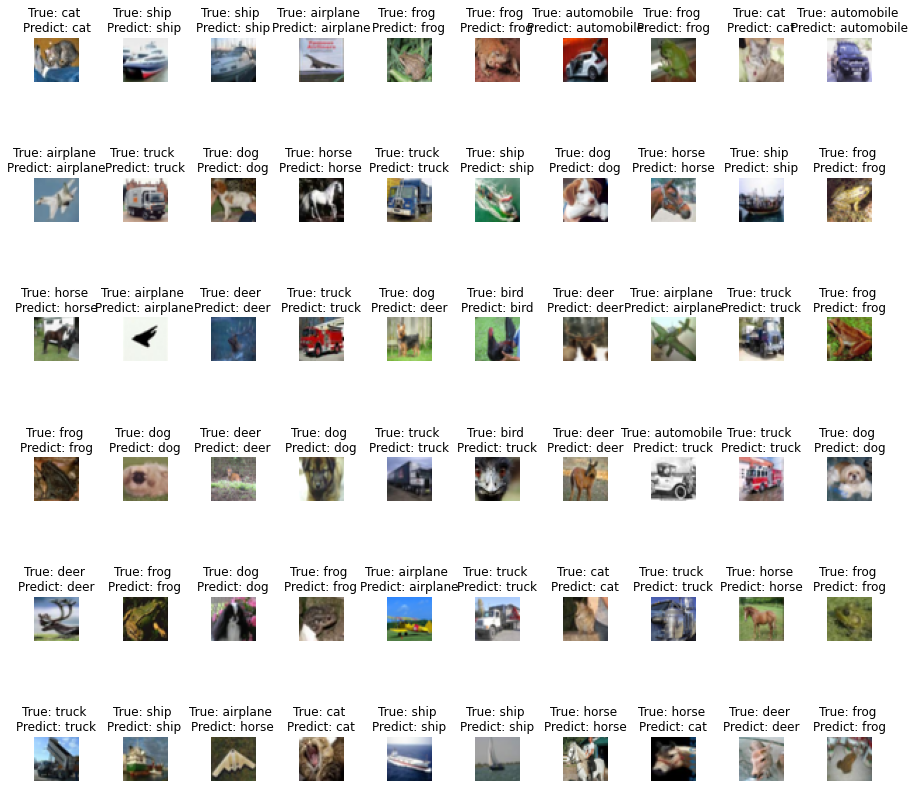

In [12]:
pred = model.predict(test_images)
pred_classes = np.argmax(pred, axis=1)
fig, axes = plt.subplots(6, 10, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 60):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
